## Feature selectie

Om te kijken welke features in het machine learning model het beste presteren wordt feature selectie toegepast. Binnen feature selectie zijn drie methoden die toegepast kunnen worden: filter, wrapper en embedded methode (Frédéric Magoulès, 2012). De filter methode richt zich op het rangschikken van de features in rangorde. De wrapper methode beoordeeld de features op basis van de nauwkeurigheid. En de embedded methode beoordeeld ook de nauwkeurigheid van de features, alleen vind deze direct in het trainingsproces plaats.

### Filter methode
In dit notebook wordt de filtermethode toegepast.
Het uitvoeren van de filter methode wordt uitgevoerd voordat de features geïmplementeerd worden in het machine learning model (Frédéric Magoulès, 2012). Een methode die gebruikt kan worden om de features te rangschikken is de correlatie coëfficiënt. Een correlatie is de relatie tussen verschijnselen of variabelen die variëren of samen voorkomen die niet op toeval berusten. Met de correlatie coëfficiënt wordt de waarde van de samenhang aangetoond en kan daarom gebruikt worden om de features te rangschikken. Hoe sterker de realtie, hoe dichter de waarde bij 1 ligt.

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ophalen van de dataset
energie_features_inflatie = pd.read_csv('energie_features_inflatie.csv')
energie_features_inflatie.head()

,Datum,energie,wind_richting,zon_perc,zon_straling,dag_vocht,max_vocht,min_vocht,vector_wind,wind,...,min_temp_6m,max_temp_6m,zon_uren_6m,duur_neerslag_6m,dag_neerslag_6m,max_neerslag_6m,dag_luchtdruk_6m,max_luchtdruk_6m,min_luchtdruk_6m,CPI_energie_6m
0,2001-01,9267,141.483871,27.967742,241.870968,90.161290,96.580645,79.483871,3.403226,3.693548,...,11.641935,19.548387,3.954839,1.854839,3.151613,1.567742,1012.616129,1015.319355,1009.887097,54.71
1,2001-02,8266,181.642857,32.250000,483.571429,88.000000,97.464286,73.964286,3.050000,3.639286,...,11.593548,22.809677,6.825806,0.709677,1.380645,0.903226,1017.519355,1019.232258,1015.712903,54.71
2,2001-03,8962,142.580645,17.419355,570.774194,85.548387,95.451613,72.354839,3.448387,3.829032,...,12.110000,19.946667,3.846667,1.680000,2.280000,1.186667,1013.006667,1015.930000,1010.070000,54.68
3,2001-04,8156,226.400000,34.766667,1220.166667,78.933333,96.333333,56.133333,3.390000,3.926667,...,7.700000,14.954839,3.161290,3.006452,3.393548,1.358065,1010.248387,1014.483871,1005.770968,55.02
4,2001-05,8304,134.645161,56.967742,2028.741935,71.645161,93.548387,50.322581,3.619355,3.835484,...,5.393333,10.120000,2.030000,3.100000,3.916667,1.366667,1002.100000,1006.016667,997.723333,55.08


Om de categorieen te kunnen filteren is de correlatie coëfficiënt berekend van de features. De correlatie coëfficiënt van iedere feature is weergeven in de heatmap. Om dit overzichtelijker te maken zijn de resulaten gecategoriseerd in sterke, medium en zwakke features. De correlatie coëfficiënt van de sterke features ligt boven de 0.7, voor medium features ligt deze tussen de 0.7 en 0.4 als laatste ligt de waarde van de zwakke features onder de 0.4 (User's guide to correlation coefficients, 2018).  

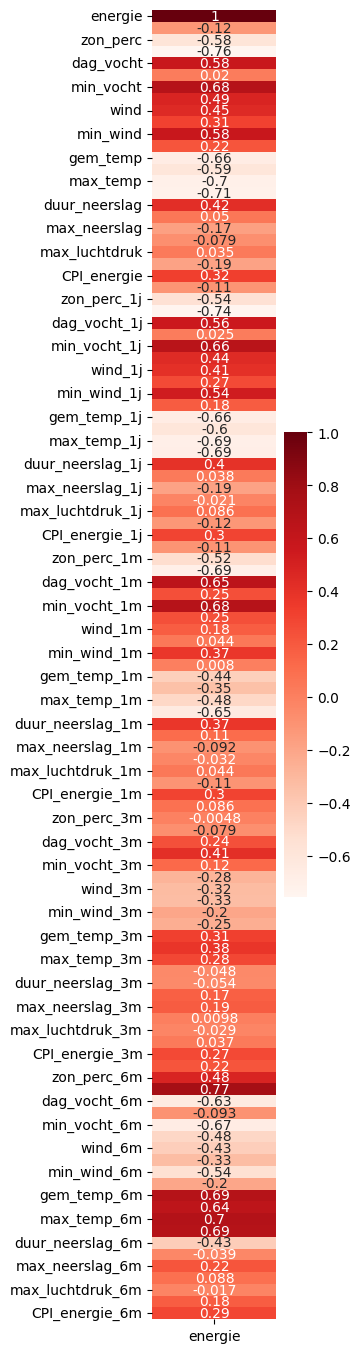

In [3]:
plt.figure(figsize=(2,17))
correlatie = energie_features_inflatie.corr()
sns.heatmap(correlatie[['energie']], annot=True, cmap=plt.cm.Reds)
plt.show()

De correlatie coëfficiënt van de categorie sterke features heeft een waarde die boven de 0.7 ligt en zijn hieronder beschreven (User's guide to correlation coefficients, 2018). 

In [4]:
correlatie_target = abs(correlatie["energie"])
sterke_features = correlatie_target[(correlatie_target>0.7)] 
sterke_features.sort_values(ascending=False)

energie            1.000000
zon_straling_6m    0.773260
zon_straling       0.756647
zon_straling_1j    0.744095
zon_uren           0.713787
max_temp           0.703287
Name: energie, dtype: float64

De correlatie coëfficiënt van de categorie medium features heeft een waarde die tussen de 0.7 en 0.4 ligt en zijn hieronder beschreven (User's guide to correlation coefficients, 2018). 

In [5]:
medium_features = correlatie_target[(correlatie_target<0.7) & (correlatie_target >0.4)]
medium_features.sort_values(ascending=False)

max_temp_6m         0.696877
max_temp_1j         0.694625
zon_straling_1m     0.693240
gem_temp_6m         0.687302
zon_uren_6m         0.686776
zon_uren_1j         0.686272
min_vocht_1m        0.682482
min_vocht           0.681833
min_vocht_6m        0.666925
gem_temp            0.664283
min_vocht_1j        0.661727
gem_temp_1j         0.661502
zon_uren_1m         0.646097
dag_vocht_1m        0.645245
min_temp_6m         0.639302
dag_vocht_6m        0.634517
min_temp_1j         0.598291
min_temp            0.592309
zon_perc            0.584093
min_wind            0.578514
dag_vocht           0.576051
dag_vocht_1j        0.557339
zon_perc_1j         0.544207
min_wind_6m         0.539357
min_wind_1j         0.538446
zon_perc_1m         0.521623
vector_wind         0.485132
max_temp_1m         0.482711
vector_wind_6m      0.478832
zon_perc_6m         0.478644
wind                0.449212
vector_wind_1j      0.438837
gem_temp_1m         0.435676
wind_6m             0.428701
duur_neerslag_

De correlatie coëfficiënt van de categorie zwakke features heeft een waarde die onder de 0.4 ligt en zijn hieronder beschreven (User's guide to correlation coefficients, 2018). 

In [6]:
#alle zwakke_features laten zien
pd.set_option('display.max_rows', 100)

zwakke_features = correlatie_target[correlatie_target<0.4]
zwakke_features.sort_values(ascending=False)

duur_neerslag_1j    0.397445
min_temp_3m         0.376372
min_wind_1m         0.373125
duur_neerslag_1m    0.372689
min_temp_1m         0.347232
max_wind_3m         0.330777
max_wind_6m         0.325722
CPI_energie         0.322885
wind_3m             0.320947
gem_temp_3m         0.314851
max_wind            0.313721
CPI_energie_1m      0.302795
CPI_energie_1j      0.296998
CPI_energie_6m      0.288748
max_temp_3m         0.281106
vector_wind_3m      0.279196
CPI_energie_3m      0.273638
max_wind_1j         0.265992
vector_wind_1m      0.247795
max_vocht_1m        0.246465
max_windstoot_3m    0.246353
dag_vocht_3m        0.243129
wind_richting_6m    0.222895
max_windstoot       0.220819
max_neerslag_6m     0.220325
min_wind_3m         0.204228
max_windstoot_6m    0.203595
max_neerslag_3m     0.189490
max_neerslag_1j     0.185439
min_luchtdruk       0.185199
max_windstoot_1j    0.184217
wind_1m             0.181382
min_luchtdruk_6m    0.181348
max_neerslag        0.170079
dag_neerslag_3

## Bronnenlijst
Frédéric Magoulès, H.-X. Z. (2012). Feature Selection for Predicting Building Energy Consumption Based on Statistical Learning Method. Journal of Algorithms & Computational Technology (JACT), 59 - 77. <br>
User's guide to correlation coefficients. (2018). Opgehaald van Elsevier: https://reader.elsevier.com/reader/sd/pii/S2452247318302164?token=E11A0EBE00E0C7F51CBA210587E78A590D766D3D4B80A302BC236F5F595425F4A1D3DC7598492D811D47690577FE563D&originRegion=eu-west-1&originCreation=20221029124403 <br>